In [1]:
import numpy as np
import pandas as pd

In [2]:
#0.load data
dt=pd.read_csv("D:\Data\python\data0.csv") 

#show the top 5 rows of data
dt.head() 

,id,grp1,grp2,cov1,cov2,cov3,cov4,f1,f2,f3,f4,out1,out2,out3,out4,out4t
0,1,0,2,10.588393,5.765045,0,2,8.883864,0.791934,1,1,5.031413,0,1,1,201
1,2,1,0,10.095498,5.273806,0,1,8.497210,0.881411,1,0,5.737039,0,2,1,125
2,3,0,2,10.221286,5.135972,1,2,8.175174,0.177713,0,2,5.387061,1,2,0,152
3,4,1,3,10.884562,5.459708,0,0,8.421732,0.052869,1,3,5.031891,0,2,1,148
4,5,0,2,10.707055,5.306728,0,1,8.714487,0.128239,1,1,5.337904,1,1,0,127


In [ ]:
#Data mining alogrithms inlcude 1.principal component analysis, 2.factor analysis, 3.cluster analysis, 4.association analysis.

In [3]:
#1. Principal component analysis
from matplotlib.mlab import PCA as mlabPCA

In [4]:
x=dt[["cov1","cov2","f1","f2","out1"]] #selet columns
x.head()

,cov1,cov2,f1,f2,out1
0,10.588393,5.765045,8.883864,0.791934,5.031413
1,10.095498,5.273806,8.497210,0.881411,5.737039
2,10.221286,5.135972,8.175174,0.177713,5.387061
3,10.884562,5.459708,8.421732,0.052869,5.031891
4,10.707055,5.306728,8.714487,0.128239,5.337904


In [5]:
x_pca0=mlabPCA(x,standardize=True) #standardize para means standarization of orignial data

In [6]:
len(x_pca0.s) #original eigenvalues 

5

In [7]:
x_var=pd.DataFrame((x_pca0.s)/np.mean(x_pca0.s),columns=["Eigenvalue"])#,index=list(range(0,len(x_pca0.s))))

In [8]:
s=0
p,c=[],[]
for i in range(0,len(x_pca0.fracs)):
    s+=x_pca0.fracs[i]
    p.append(x_pca0.fracs[i])
    c.append(s)
x_var["Proportion"]=p
x_var["Cumulative"]=c
x_var

,Eigenvalue,Proportion,Cumulative
0,1.201067,0.240213,0.240213
1,1.114510,0.222902,0.463115
2,1.000528,0.200106,0.663221
3,0.866697,0.173339,0.836560
4,0.817198,0.163440,1.000000


In [9]:
import matplotlib.pyplot as plt

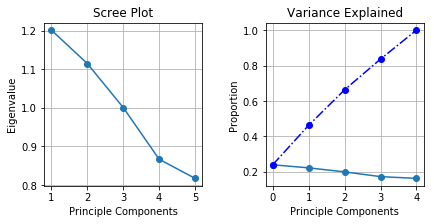

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(6.8,3)
fig.subplots_adjust(wspace=0.4)

ax1.plot(range(1,len(x_var["Eigenvalue"])+1),x_var["Eigenvalue"],"o-")
ax1.set_title("Scree Plot")
ax1.set_xlabel("Principle Components")
ax1.set_ylabel("Eigenvalue")
ax1.grid()

ax2.plot(x_var["Proportion"],"o-")
ax2.plot(x_var["Cumulative"],"bo-.")
ax2.set_title("Variance Explained")
ax2.set_xlabel("Principle Components")
ax2.set_ylabel("Proportion")
ax2.grid()
plt.show()

In [11]:
x_eigen=pd.DataFrame(x_pca0.Wt,index=["Prin1","Prin2","Prin3","Prin4","Prin5"],columns=(x.columns))
x_eigen

,cov1,cov2,f1,f2,out1
Prin1,-0.388806,0.305546,0.507590,-0.421558,0.565784
Prin2,0.551573,0.613342,0.352467,-0.180961,-0.403235
Prin3,-0.430804,0.263220,0.367162,0.753537,-0.206145
Prin4,-0.077295,0.672964,-0.670427,0.123078,0.276629
Prin5,0.594163,-0.091037,0.183951,0.454505,0.631086


In [12]:
x_pca0.Y[20]

array([-0.62376145, -1.01675657, -0.29375569,  1.40502643,  0.49266324])

In [13]:
#sklearn method for principal component analysis
from sklearn.decomposition import PCA as skPCA
from sklearn.preprocessing import scale
x_std=scale(x)
x_pca1=skPCA(n_components=len(x.columns)).fit(x_std)

In [14]:
x_pca1.explained_variance_ratio_

array([ 0.24021333,  0.22290209,  0.20010562,  0.17333943,  0.16343953])

In [15]:
x_pca1.components_

array([[ 0.38880578, -0.30554639, -0.50759043,  0.4215584 , -0.56578436],
       [ 0.55157334,  0.61334152,  0.35246734, -0.18096147, -0.40323535],
       [ 0.43080446, -0.26322042, -0.36716236, -0.7535375 ,  0.20614453],
       [ 0.07729541, -0.67296419,  0.67042723, -0.1230783 , -0.27662916],
       [-0.59416315,  0.09103738, -0.18395073, -0.4545046 , -0.6310864 ]])

In [141]:
x_pca1.transform(x_std)[:,:3]

array([[  4.81343119e-01,   1.82964279e+00,  -1.78797502e+00],
       [ -2.01321439e-01,  -1.64993369e+00,  -1.30233861e+00],
       [  3.23460563e-01,  -1.17735310e+00,   1.00967429e+00],
       [  9.25501410e-01,   1.62930797e+00,   1.44480048e+00],
       [ -1.38600054e-01,   8.53483656e-01,   9.75036637e-01],
       [  2.14536031e+00,  -8.60856257e-01,   1.13932786e-01],
       [ -4.21186583e-01,  -4.63487736e-01,  -4.07288008e-01],
       [  1.27521589e-01,   2.34975751e+00,   1.13674446e-01],
       [ -1.31198677e+00,  -1.53110074e+00,   6.66992343e-02],
       [  9.07221188e-01,   2.09208495e+00,  -8.09676426e-01],
       [  1.29323518e+00,  -1.24976474e+00,   2.39615567e-01],
       [  2.99061897e-01,   3.88699586e-01,  -1.55976418e+00],
       [  1.57323507e-01,   1.08277076e+00,   1.83561414e-01],
       [  1.96599479e+00,  -7.98722294e-01,  -5.99659283e-02],
       [ -9.38482385e-01,  -1.09303309e+00,   1.76375636e-01],
       [ -7.44213355e-02,  -7.98246108e-01,  -2.8156063

In [17]:
#2 Factor analysis
from sklearn.decomposition import FactorAnalysis as skFA
x_fa0=skFA(n_components=len(x.columns)-1).fit(x_std)
x_fa0.components_

array([[ 0.31349452, -0.08372234, -0.22760257,  0.20103992, -0.41522561],
       [ 0.22781411,  0.32722047,  0.25784691, -0.17623849, -0.10454889],
       [ 0.18017429, -0.10927974, -0.15685805, -0.260969  ,  0.11641883],
       [-0.01376186, -0.06224762,  0.05036597, -0.03363529, -0.03969001]])

In [18]:
x_fa1=skFA(n_components=len(x.columns)-3).fit_transform(x)
x_fa1

array([[ 0.58145305,  0.86983073],
       [-0.36209442, -0.54263753],
       [ 0.11671767, -0.58622695],
       [ 0.77046013,  0.42801083],
       [ 0.13261042,  0.25468959],
       [ 0.74524476, -0.70565516],
       [-0.18422671, -0.04043959],
       [ 0.52372751,  0.98023624],
       [-0.87028842, -0.46309866],
       [ 0.74866332,  0.86266406],
       [ 0.10424969, -0.77272842],
       [ 0.28856573,  0.31954821],
       [ 0.16413258,  0.37913317],
       [ 0.92991644, -0.54505935],
       [-0.66872927, -0.39845476],
       [-0.39974389, -0.31564746],
       [ 0.81481972,  0.58654915],
       [ 0.04572512,  0.42603393],
       [ 0.02848338,  0.55122449],
       [-0.09839712, -0.36845036],
       [-0.0031074 , -0.52497023],
       [-0.5347322 ,  0.73217491],
       [ 0.49355905, -0.10530405],
       [ 0.46206812, -0.61663372],
       [ 0.03168645, -0.90701082],
       [-0.49826526,  0.39264158],
       [-0.56825035, -0.76556987],
       [-0.70158855, -0.25769856],
       [-1.06951489,

In [19]:
#3. cluster analysis
import scipy.cluster.hierarchy as hc

In [67]:
x.T.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
cov1,10.588393,10.095498,10.221286,10.884562,10.707055,10.800508,10.112467,10.719355,10.088543,10.726843,...,10.704347,10.672829,10.503478,10.189143,10.648285,10.232699,10.301163,10.147399,10.489219,10.002984
cov2,5.765045,5.273806,5.135972,5.459708,5.306728,5.018221,5.612618,5.841985,5.369478,5.973922,...,5.657331,5.682860,5.433637,5.833525,5.176895,5.421292,5.105423,5.309993,5.223231,5.677387
f1,8.883864,8.497210,8.175174,8.421732,8.714487,8.184064,8.335138,8.664684,8.435034,8.459008,...,8.065560,8.876795,8.733571,8.433563,8.591199,8.663537,8.065279,8.903022,8.770211,8.379541
f2,0.791934,0.881411,0.177713,0.052869,0.128239,0.895987,0.439923,0.214349,0.408121,0.632905,...,0.622428,0.561536,0.537349,0.539336,0.235551,0.063639,0.718726,0.981846,0.443421,0.484544
out1,5.031413,5.737039,5.387061,5.031891,5.337904,5.440905,5.487158,5.022289,5.951515,5.053601,...,5.593622,5.543374,5.919313,5.786725,5.308579,5.399351,5.073307,5.365244,5.872374,5.967933


In [83]:
#3.1 Hierarchical cluster with R type
z=hc.linkage(x.T,method="average") #Perform hierarchical/agglomerative clustering with average method

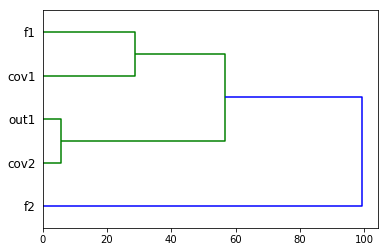

In [84]:
dd=hc.dendrogram(z,orientation="right",labels=list(x.columns)) #Plot the hierarchical clustering as a dendrogram.
plt.show()

In [136]:
#3.2 K-means cluster
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,n_jobs=4,max_iter=300)
ykm=km.fit_predict(x)

In [137]:
r1=pd.Series(km.labels_).value_counts()
r2=pd.DataFrame(km.cluster_centers_)
r=pd.concat([r2,r1],axis=1)
r.columns=list(x.columns)+[u'num_ctg']
print(r)

        cov1      cov2        f1        f2      out1  num_ctg
0  10.228976  5.511173  8.609650  0.444046  5.712498       67
1  10.484031  5.375691  8.356260  0.737914  5.302476       67
2  10.702530  5.475819  8.466701  0.239375  5.483201       66


In [138]:
r=pd.concat([x,pd.Series(km.labels_,index=x.index)],axis=1)
r.columns=list(x.columns)+[u"cluster_type"]
r.head()

,cov1,cov2,f1,f2,out1,cluster_type
0,10.588393,5.765045,8.883864,0.791934,5.031413,1
1,10.095498,5.273806,8.497210,0.881411,5.737039,0
2,10.221286,5.135972,8.175174,0.177713,5.387061,2
3,10.884562,5.459708,8.421732,0.052869,5.031891,2
4,10.707055,5.306728,8.714487,0.128239,5.337904,2


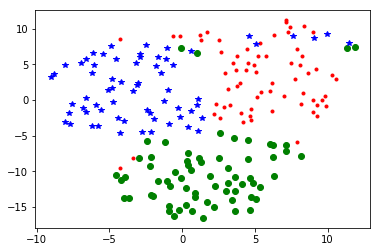

In [139]:
from sklearn.manifold import TSNE
tsne=TSNE()
tsne.fit_transform(x)
tsne=pd.DataFrame(tsne.embedding_,index=x.index)
d=tsne[r[u"cluster_type"]==0]
plt.plot(d[0],d[1],"r.")
d=tsne[r[u"cluster_type"]==1]
plt.plot(d[0],d[1],"go")
d=tsne[r[u"cluster_type"]==2]
plt.plot(d[0],d[1],"b*")
plt.show()

In [153]:
#4 association rule analysis
assx=dt[["grp1","grp2","cov3","cov4","f3","f4","out2"]]
assx.head()

,grp1,grp2,cov3,cov4,f3,f4,out2
0,0,2,0,2,1,1,0
1,1,0,0,1,1,0,0
2,0,2,1,2,0,2,1
3,1,3,0,0,1,3,0
4,0,2,0,1,1,1,1


In [154]:
#4.1 FP-growth algorithms
from fp_growth import find_frequent_itemsets as fpg
for its in fpg(assx,minimum_support=int(len(assx))*0.1):
    if nan in its:
        pass
    elif len(its)==1:
        pass
    else:
        print(its[::-1])
        

ModuleNotFoundError: No module named 'fp_growth'